In [111]:
#Import modules
import pandas as pd

In [112]:
# Load the CSV file
base = '../rcie-system-metrics-data/'
domain = '2023-04-18_13-59-12_rcie-api-default/'
file = 'metrics-with-output-and-standardized-unit.csv'
file_path = base + domain + file

In [113]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import svm

In [114]:
col_names = ["Time","Timestamp","iowait","irq","nice","softirq","steal","system","user","Used","Buffer","Cached","Free","br-10cd1f6f3899 receive","docker0 receive","eth0 receive","eth1 receive","lo receive","veth6750e95 receive","br-10cd1f6f3899 transmit","docker0 transmit","eth0 transmit","eth1 transmit","lo transmit","veth6750e95 transmit","total-req-rate","ok-req-rate","error-req-rate","avg-res-time","ServerStatus"]

# Load dataset
pima = pd.read_csv(file_path, skiprows=1, header=None, names=col_names)
pima.head()

,Time,Timestamp,iowait,irq,nice,softirq,steal,system,user,Used,...,docker0 transmit,eth0 transmit,eth1 transmit,lo transmit,veth6750e95 transmit,total-req-rate,ok-req-rate,error-req-rate,avg-res-time,ServerStatus
0,2023-04-18 13:59:10,1681801150000,0.0,0,0,0.0,0.002,0.002,0.002,311,...,0,0.0492,2.25,0.0,0.0834,0.2,0.2,0.0,1.41,0
1,2023-04-18 13:59:15,1681801155000,0.0,0,0,0.0,0.000,0.002,0.000,311,...,0,0.0408,2.28,0.0,0.0966,0.2,0.2,0.0,1.37,0
2,2023-04-18 13:59:20,1681801160000,0.0,0,0,0.0,0.000,0.002,0.004,311,...,0,0.0324,2.28,0.0,0.0918,0.2,0.2,0.0,1.36,0
3,2023-04-18 13:59:25,1681801165000,0.0,0,0,0.0,0.002,0.000,0.004,311,...,0,0.0000,2.27,0.0,0.0834,0.2,0.2,0.0,1.36,0
4,2023-04-18 13:59:30,1681801170000,0.0,0,0,0.0,0.000,0.002,0.002,311,...,0,0.0000,2.27,0.0,0.0966,0.2,0.2,0.0,1.38,0


In [115]:
# Split dataset in features and target variable
feature_cols = ["iowait","irq","nice","softirq","steal","system","user","Used","Buffer","Cached","Free","br-10cd1f6f3899 receive","docker0 receive","eth0 receive","eth1 receive","lo receive","veth6750e95 receive","br-10cd1f6f3899 transmit","docker0 transmit","eth0 transmit","eth1 transmit","lo transmit","veth6750e95 transmit","total-req-rate","ok-req-rate","error-req-rate","avg-res-time"]
X = pima[feature_cols] # Features
y = pima.ServerStatus # Target variable

In [116]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [117]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Decision Tree Classification

In [118]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [119]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9059561128526645


#### Optimizing Decision Tree Performance

In [120]:
# Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9278996865203761


#### Visualizing Confusion Matrix using Heatmap

In [121]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[536,  18],
       [ 28,  56]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

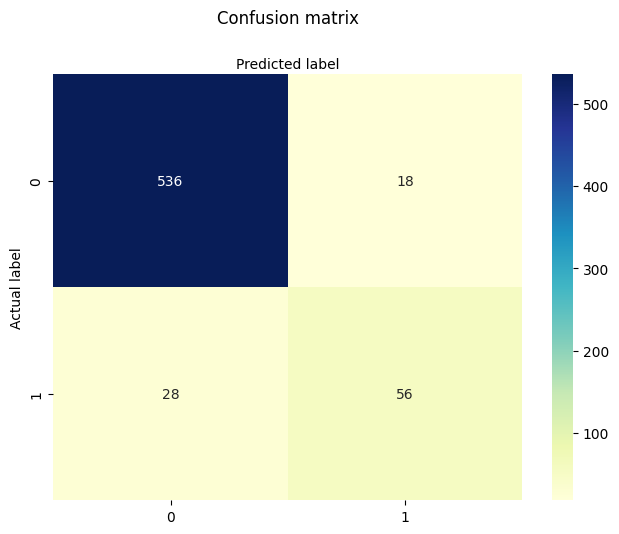

In [122]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
# # Visualizing Decision Trees
# from six import StringIO 
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

### K-Nearest Neighbors Classification

In [124]:
# Create K-Nearest Neighbors classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train K-Nearest Neighbors classifier
knn.fit(X_train_scale, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test_scale)

In [125]:
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.945141065830721


#### Using Cross Validation to Get the Best Value of k

In [126]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

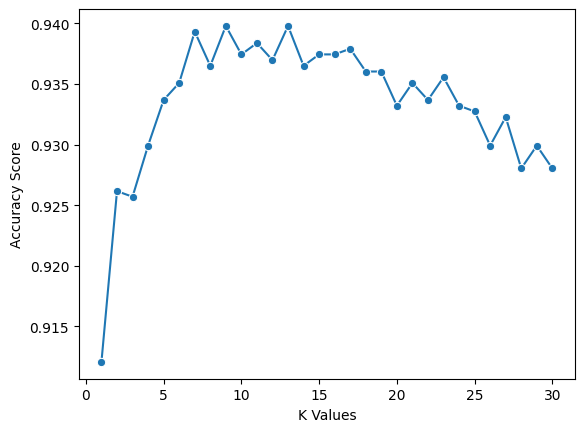

In [127]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [128]:
# More Evaluation Metrics
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [129]:
# then evaluate with accuracy, precision, and recall (note your results may differ due to randomization)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9388714733542319
Precision: 0.835820895522388
Recall: 0.6666666666666666


#### Visualizing Confusion Matrix using Heatmap

In [130]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[543,  11],
       [ 28,  56]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

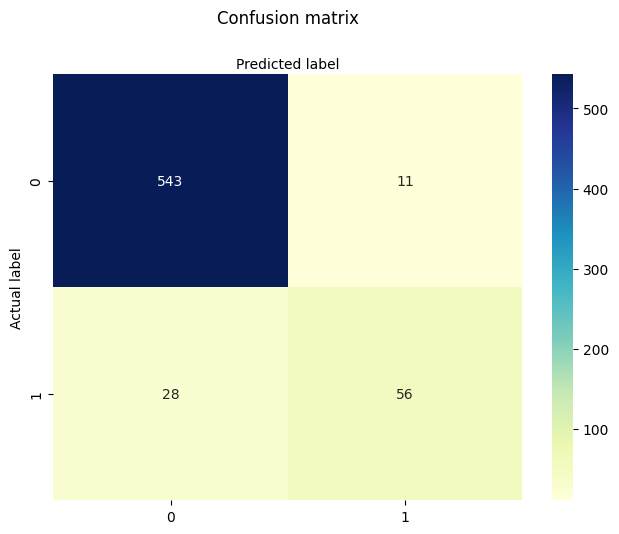

In [131]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Logistic Regression

In [132]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict the response for new observations
y_pred = logreg.predict(X_test)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9420062695924765


#### Visualizing Confusion Matrix using Heatmap

In [134]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[542,  12],
       [ 25,  59]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

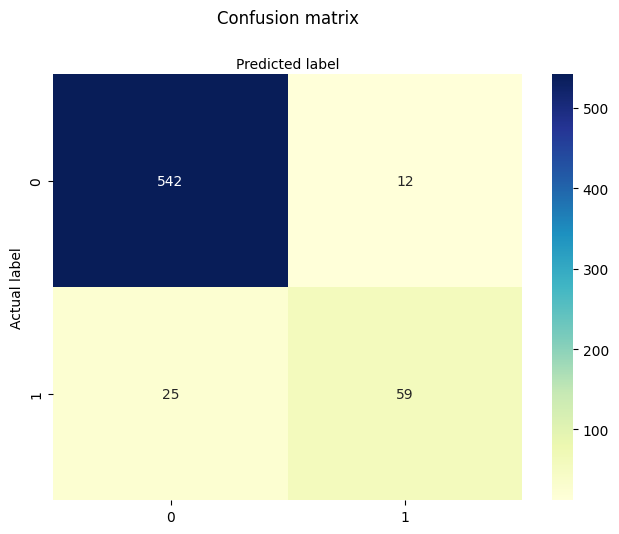

In [135]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

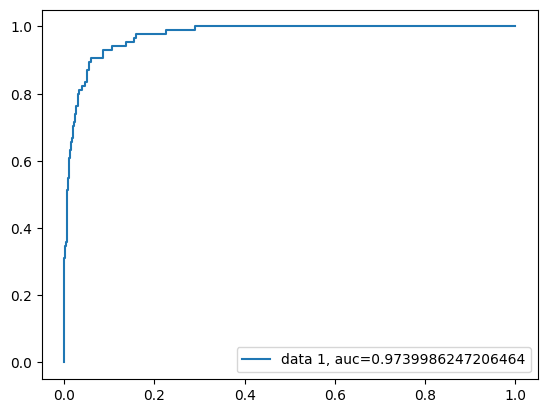

In [136]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machines

In [137]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [138]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9467084639498433


In [139]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.8378378378378378
Recall: 0.7380952380952381


#### Visualizing Confusion Matrix using Heatmap

In [140]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[542,  12],
       [ 22,  62]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

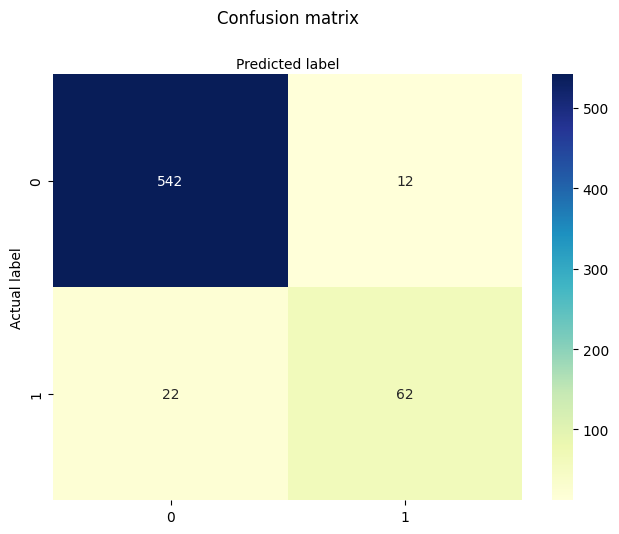

In [141]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')